In [72]:
library(data.table)
library(dplyr)
library(ggplot2)
library(cowplot)
source('/home/jmurga/mkt/201902/scripts/src/plotStyle.R')
source('/home/jmurga/mkt/201902/scripts/src/minimumNumberPi.R')

In [2]:
options(repr.plot.width=6, repr.plot.height=4)

In [3]:
load('/home/jmurga/mkt/201902/rawData/popflydata.RData')
dataset <- popflydata[pop=='RAL']

In [4]:
dataset %>% head

pop,id,chr,start,end,p0,pi,d0,di,m0,mi,daf0f,daf4f,cM_Mb
RAL,FBgn0000008,2R,18024473,18060339,42,44,32,19,647,2449,30;8;1;1;1;0;0;0;1;1;0;0;1;0;0;0;0;0;0;0,22;4;6;2;0;0;1;1;1;0;0;2;1;0;0;0;1;0;0;1,2.1692837
RAL,FBgn0000014,3R,12632936,12655771,4,2,20,0,155,643,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;0;0;2;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0,0.7616990
RAL,FBgn0000015,3R,12752932,12797958,9,4,3,0,150,630,4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,3;0;1;0;0;0;1;0;0;0;1;2;0;0;1;0;0;0;0;0,0.4352566
RAL,FBgn0000017,3L,16608966,16640982,21,17,81,134,867,3263,16;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0,15;2;0;0;0;0;0;0;0;0;0;0;0;0;2;0;0;0;0;2,0.8999361
RAL,FBgn0000018,2L,10973443,10975293,13,10,18,17,232,1019,5;0;0;0;0;1;0;1;0;0;0;0;2;1;0;0;0;0;0;0,5;2;1;0;0;0;2;1;0;1;0;0;1;0;0;0;0;0;0;0,2.9318767
RAL,FBgn0000022,X,264064,264980,0,1,17,73,63,345,0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,0.0000000


In [5]:
setwd('/home/jmurga/mkt/201902/rawData/simulations/baseline')
listDiv <- lapply(list.files(pattern = 'div',recursive=T),fread,sep='\t',header=T)
listDiv <- do.call(rbind,listDiv) %>% as.data.table
listDiv %>% head

d,d0,trueAlpha
647,1017,0.312210
611,1100,0.351882
591,1038,0.323181
589,1025,0.314092
582,1067,0.331615
633,1015,0.333333


##### Dmel divergence

In [5]:
Di <- round(mean(dataset$di))
D0 <- round(mean(dataset$d0))

Pi,P0,Di,D0,alpha,pvalue
1,18,18,18,"0,9444444","0,0008500062"
2,18,18,18,"0,8888889","0,0033506049"
3,18,18,18,"0,8333333","0,0099778248"
4,18,18,18,"0,7777778","0,0248186339"
5,18,18,18,"0,7222222","0,0541415945"
6,18,18,18,"0,6666667","0,0644610316"


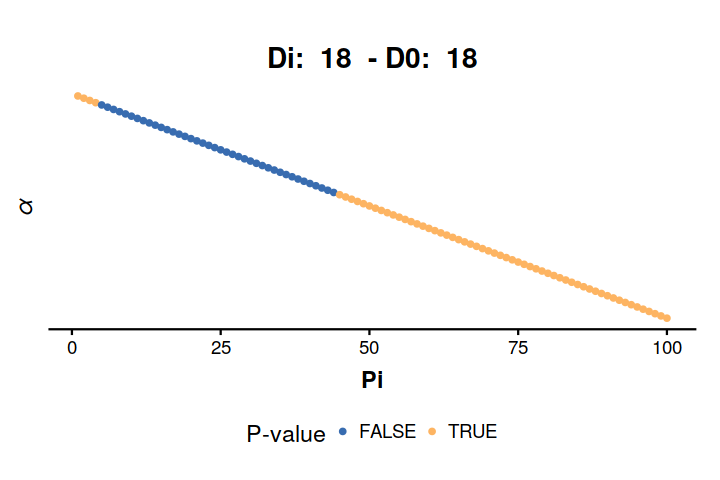

In [15]:
ralDiv <- tableToIter(Di,D0,100)
ralDiv$results %>% head
ralDiv$plot

##### Changing divergence

###### Precomputed ratios

In [36]:
divergenceCombination <- read.table("/home/jmurga/mkt/Minimum_number_Pi/divergence_combinations",header=T,sep="\t")
divergenceCombination %>% head

D0,Di
54,54
54,36
36,54
54,18
18,54
54,9


In [40]:
output <- tableToIter(data=divergenceCombination,iterations=100,combinations='divergence')
output$results %>% head

di,d0,>Pi,sign_pos,>Pi,sign_neg
54,54,29,29,92,9
36,54,18,18,66,35
54,36,27,27,98,3
18,54,6,6,36,65
54,18,22,22,NA,0
9,54,1,1,22,79


###### Manual combinations

In [73]:
options(repr.plot.width=10, repr.plot.height=10)

In [74]:
ratio05 <- createCombinations(listLengthToExpand=100,ratioD=0.5,ratioP=2)
polDiv05 <- tableToIter(data=ratio05,iterations=length(ratio05$Di),combinations = 'polymorphism')

pi,p0,di,d0,alpha,pvalue,nd,np
1,2,2,1,0,1.0000000,3,3
2,4,2,1,0,0.5238095,3,6
3,6,2,1,0,0.5227273,3,9
4,8,2,1,0,0.5252747,3,12
5,10,2,1,0,0.5281863,3,15
6,12,2,1,0,0.5308271,3,18


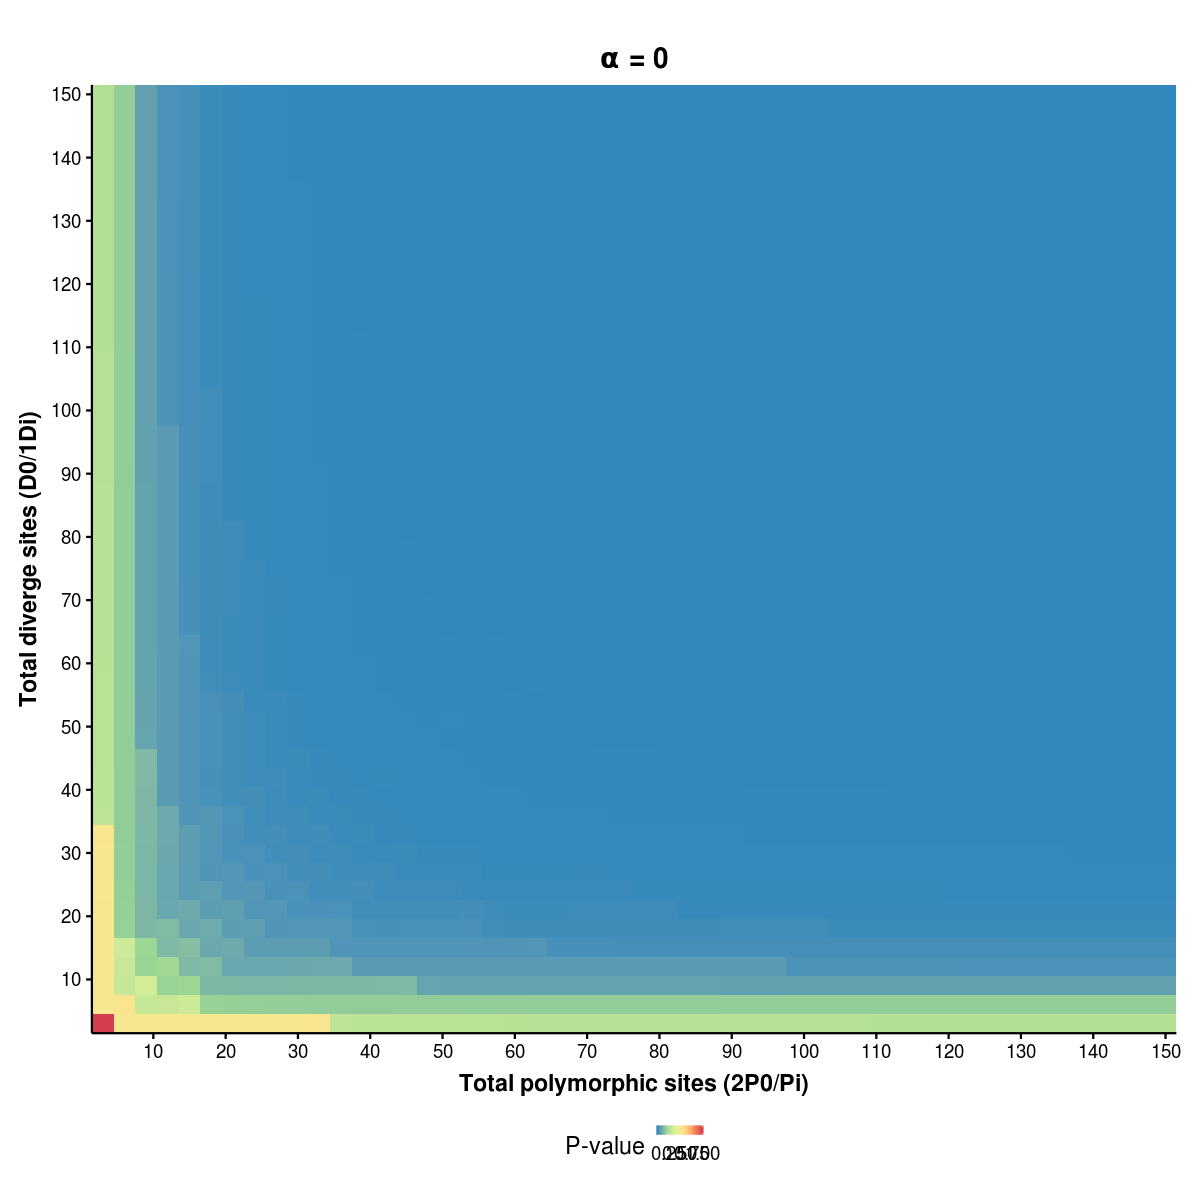

In [75]:
polDiv05$results%>%head
polDiv05$plot

In [77]:
ratio025 <- createCombinations(listLengthToExpand=100,ratioD=0.25,ratioP=2)
polDiv025 <- tableToIter(data=ratio025,iterations=length(ratio025$Di),combinations = 'polymorphism')

pi,p0,di,d0,alpha,pvalue,nd,np
1,2,4,1,0.875,0.4642857,5,3
2,4,4,1,0.875,0.2424242,5,6
3,6,4,1,0.875,0.2657343,5,9
4,8,4,1,0.875,0.1312217,5,12
5,10,4,1,0.875,0.1273220,5,15
6,12,4,1,0.875,0.1268686,5,18


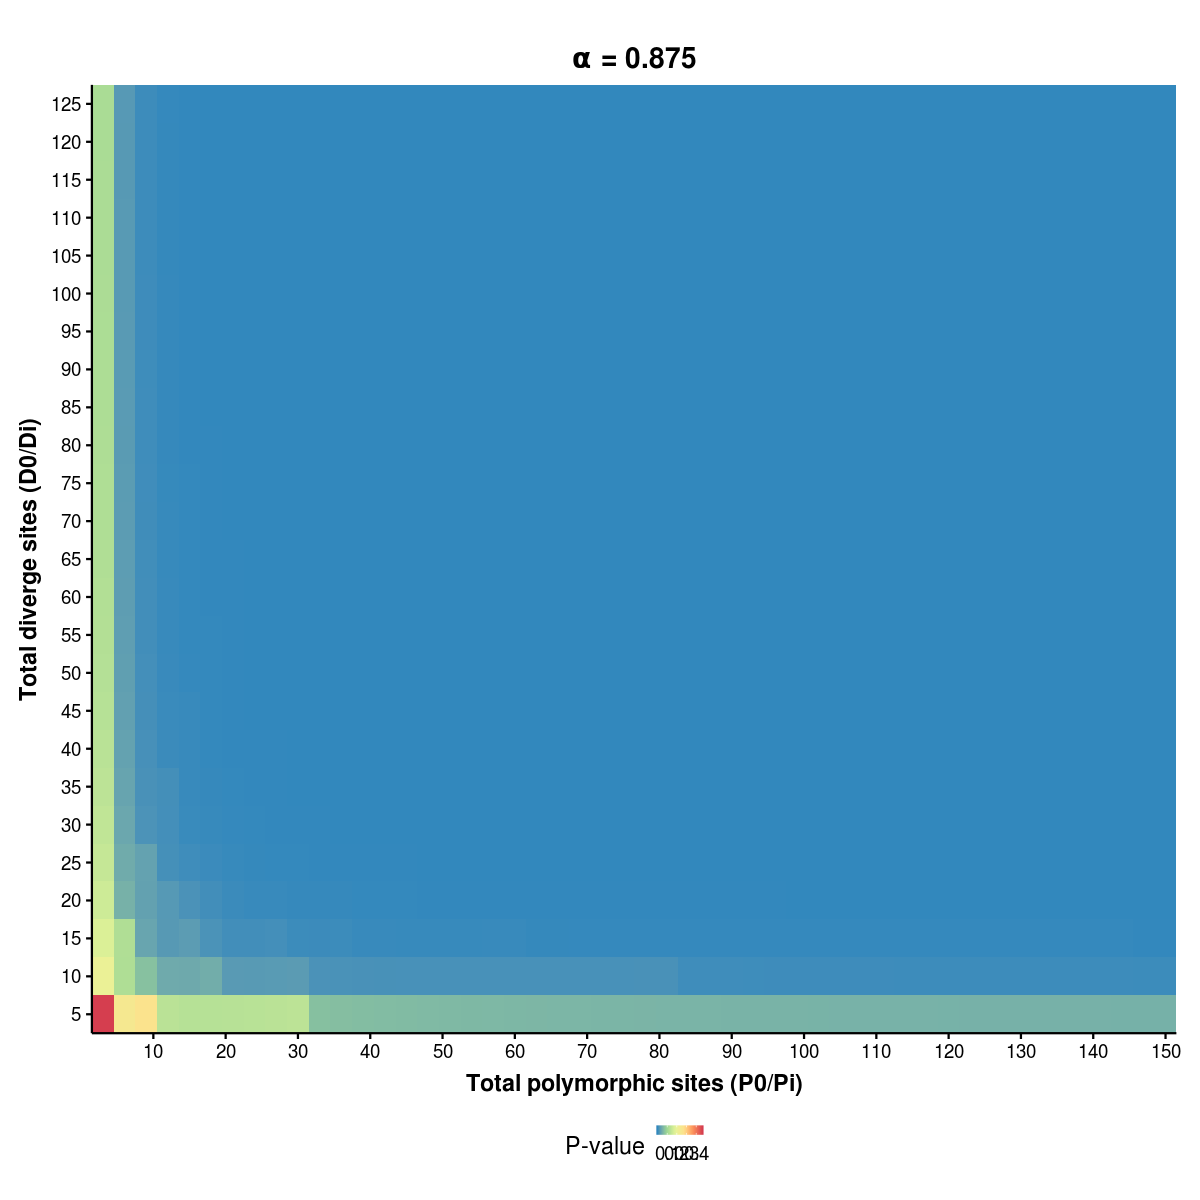

In [76]:
polDiv025$results%>%head
polDiv025$plot